# Composite Integration


It usually doesn't pay to go to higher-order polynomials (e.g., fitting a cubic to 4 points in the domain).  Instead, we can do composite integration by dividing our domain $[a, b]$ into slabs, and then using the above approximations.

Here's an illustration of dividing the domain into 6 slabs:

![compound integration examples with N=6](compound2.png)

Imagine using $N$ slabs.
For the rectangle and trapezoid rules, we would apply them N times (once per slab) and sum up the integrals in each slab.
For the Simpson's rule, we would apply Simpson's rule over 2 slabs at a time and sum up the integrals over the $N/2$ pair of slabs (this assumes that $N$ is even).


The composite rule for trapezoid integration is:

$$
\int_a^b f(x) dx = \frac{\Delta x}{2} \sum_{i=0}^{N-1} (f_i + f_{i+1}) + \mathcal{O}(\Delta x^2)
$$

and for Simpson's rule, it is:

$$
\int_a^b f(x) dx = \frac{\Delta x}{3} \sum_{i = 0}^{N/2-1} (f_{2i} + 4 f_{2i+1} + f_{2i+2}) + \mathcal{O}(\Delta x^4)
$$

```{admonition} Example
For the function in the previous exercise, perform a composite integral using the trapezoid and Simpson's rule for $N = 2, 4, 8, 16, 32$.
Compute the error with respect to the analytic solution and make a plot of the error vs. $N$ for both methods.  Do the errors follow the scaling shown in the expressions above?
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First let's write the function we will integrate

In [2]:
def f(x):
    return 1 + 0.25 * x * np.sin(np.pi * x)

Now our composite trapezoid and Simpson's rules.  These functions will take the number of bins, $N$, and the integration limits $[a, b]$ and then sample our function at $N+1$ points to do the composite integration.

In [3]:
def I_t(N, a, b, func):
    """composite trapezoid rule.  Here N is the number
    of bins, [a, b] are the integration limits, and
    func is the function to call."""
    
    I = 0.0
    x = np.linspace(a, b, N+1)
    
    # loop over bins
    for n in range(N):
        I += 0.5*(x[n+1] - x[n]) * (func(x[n]) + func(x[n+1]))
    return I

def I_s(N, a, b, func):
    """composite Simpsons rule.  Here N is the number
    of bins, [a, b] are the integration limits, and
    func is the function to call."""
    
    # we require an even number of bins
    assert N % 2 == 0
    
    I = 0.0
    x = np.linspace(a, b, N+1)
    
    # loop over bins
    for n in range(0, N-1, 2):
        dx = x[n+1] - x[n]
        I += dx/3.0 * (f(x[n])+ 4 * f(x[n+1]) + f(x[n+2]))
    return I

Integration limits

In [4]:
a = 0.5
b = 1.5

The analytic solution

In [5]:
I_a = 1 - 1/(2 * np.pi**2)

Now let's run for a bunch of different number of bins and store the errors

In [7]:
# number of bins
N = [2, 4, 8, 16, 32, 64, 128, 256]

# keep track of the errors for each N
err_trap = []
err_simps = []

for nbins in N:
    err_trap.append(np.abs(I_t(nbins, a, b, f) - I_a))
    err_simps.append(np.abs(I_s(nbins, a, b, f) - I_a))

Now we'll plot the errors along with the expected scaling

Text(0, 0.5, 'error')

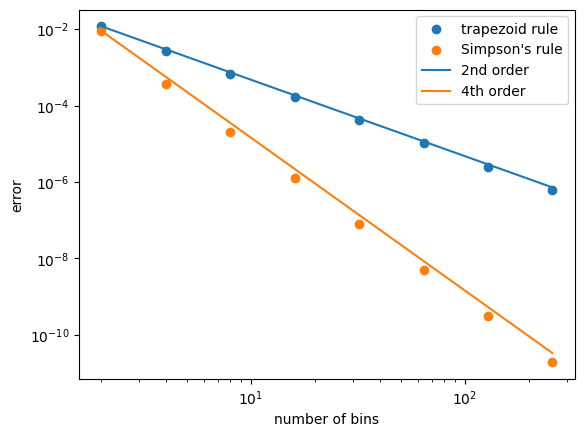

In [8]:
err_trap = np.asarray(err_trap)
err_simps = np.asarray(err_simps)
N = np.asarray(N)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(N, err_trap, label="trapezoid rule")
ax.scatter(N, err_simps, label="Simpson's rule")

# compute the ideal scaling
# err = err_0 (N_0 / N) ** order
fourth_order = err_simps[0] * (N[0]/N)**4
second_order = err_trap[0] * (N[0]/N)**2

ax.plot(N, second_order, label="2nd order")
ax.plot(N, fourth_order, label="4th order")

ax.set_xscale("log")
ax.set_yscale("log")

ax.legend()
ax.set_xlabel("number of bins")
ax.set_ylabel("error")

```{warning}
As you make the number of bins larger and larger, eventually you'll hit a limit to how accurate you can get the integral (somewhere around N ~ 4096 bins for Simpson's).  Beyond that, roundoff error dominates.
```

## C++ implementation

Here's a C++ implementation: [simpsons.cpp](https://github.com/zingale/computational_astrophysics/blob/main/examples/integration/simpsons.cpp)

```{literalinclude} ../../../examples/integration/simpsons.cpp
:language: c++
```